In [1]:
import numpy as np
import matplotlib.pyplot as plt

(1046, 3)


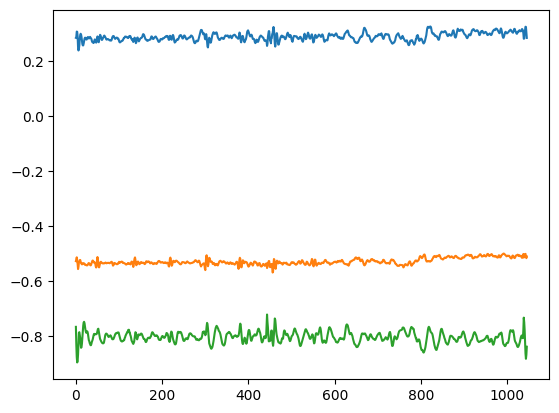

In [48]:
data = np.load("imu_data.npy")
print(data.shape)
plt.figure()
plt.plot(data[:, 0])
plt.plot(data[:, 1])
plt.plot(data[:, 2])

0.09560229445506692


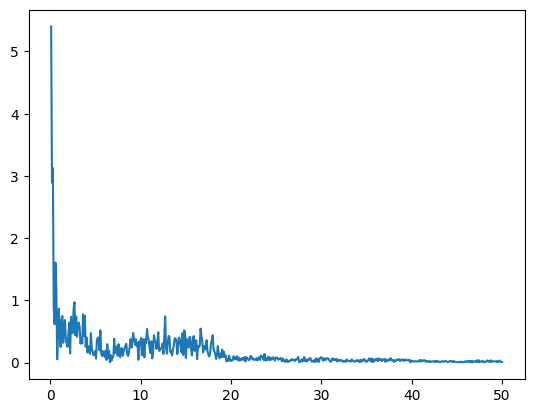

In [59]:
freq_domain = np.abs(np.fft.rfft(data[:, 1], len(data[:, 2])))[1:]
x_freq = np.fft.rfftfreq(len(data[:, 2]), 1/100)[1:]
plt.figure()
plt.plot(x_freq, freq_domain)
print(x_freq[np.argmax(freq_domain)])

In [57]:
start_ind = np.argmax(x_freq > 1)
end_ind = np.argmin(x_freq < 1.8)
interest_freqs = x_freq[start_ind-1: end_ind+1]
interest_abs = freq_domain[start_ind-1:end_ind+1]

print(interest_freqs[np.argmax(interest_abs)])

0.9560229445506692


In [ ]:
max_peak = -100
peak_freq = 0
for i in range(3):
    freq_domain = np.abs(np.fft.rfft(data[:, i], len(data[:, i])))[1:]
    x_freq = np.fft.rfftfreq(len(data[:, i]), 1/100)[1:]

    start_ind = np.argmax(x_freq > 1)
    end_ind = np.argmin(x_freq < 1.8)
    interest_freqs = x_freq[start_ind-1: end_ind+1]
    interest_abs = freq_domain[start_ind-1:end_ind+1]

    peak_mag = np.max(interest_abs)
    if peak_mag > max_peak:
        max_peak = peak_mag
        peak_freq = interest_freqs[np.argmax(interest_abs)]

print(max_peak)
print(peak_freq)